In [ ]:
pip install snscrape


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 KB 6.8 MB/s eta 0:00:00


In [ ]:
pip install locationtagger

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 KB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 61.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 30.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 KB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 KB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13552 sha256=75dc023687c13a5dac8bf566

In [ ]:
pip install pandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

query = "earthquake (help OR stuck) (#earthquake)"
tweets =[]
limit = 100
for tweet in sntwitter.TwitterSearchScraper(query).get_items():

   # print(vars(tweet))
    #break
    if len(tweets) == limit:
      break
    else:
      tweets.append([tweet.date,tweet.user.username,tweet.rawContent, tweet.user.location])
df= pd.DataFrame(tweets,columns=['Date','User','Tweet','Location'])
print(df)
df.to_csv(r'D:\New folder\tweets.csv', sep=',', index=False)

                        Date            User  \
0  2023-03-12 19:47:06+00:00  JosephAlsousou   
1  2023-03-12 16:41:57+00:00    LuluWalcott1   
2  2023-03-12 11:35:25+00:00   TabibianMDPhD   
3  2023-03-12 10:11:37+00:00    Abdo_Milad05   
4  2023-03-12 06:33:26+00:00    Lotteruppert   
..                       ...             ...   
95 2023-03-06 23:28:50+00:00     Lisa_Trump3   
96 2023-03-06 19:37:16+00:00  IsraelCriminal   
97 2023-03-06 17:58:32+00:00   gbibuildingco   
98 2023-03-06 15:30:47+00:00   EasternHerald   
99 2023-03-06 14:01:55+00:00      baitulmaal   

                                                Tweet              Location  
0   Desperation and resilience!  \n\nThis man in E...            Oxford, UK  
1                 #Syria #Earthquake #Help #Donations       Los Angeles, CA  
2   @duyguomuzl @Meghesik @melina_power @Yacoubian...   Լեռնային Աշխարհ, CA  
3   Turkey Destroyed by massive Earthquake | India...                 libya  
4   In this kitchen in Kahramanma

In [ ]:
df.shape

(100, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   Date      100 non-null    datetime64[ns, UTC]
 1   User      100 non-null    object             
 2   Tweet     100 non-null    object             
 3   Location  100 non-null    object             
dtypes: datetime64[ns, UTC](1), object(3)
memory usage: 3.2+ KB


No null values in any of the column so going for visualization

In [ ]:
#counts number of charcters in each tweet
def get_charcounts(x):
	s = x.split()
	x = ''.join(s)
	return len(x)
df['char_counts'] = df['Tweet'].apply(lambda x: get_charcounts(x))
print(df['char_counts'])

0     197
1      32
2     560
3     145
4     257
     ... 
95    140
96    238
97    174
98    145
99    268
Name: char_counts, Length: 100, dtype: int64


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='char_counts', ylabel='Density'>

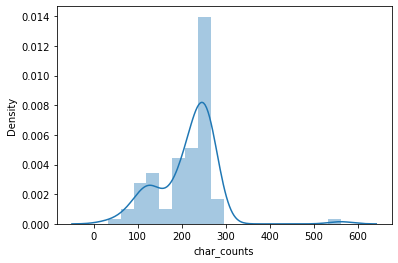

In [ ]:
#plot a graph showing the distribution for the number of characters for tweets
import seaborn as sns
sns.distplot(df['char_counts'])


<AxesSubplot:xlabel='char_counts', ylabel='Density'>

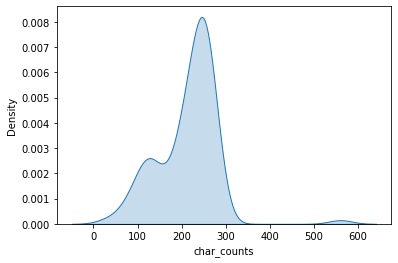

In [ ]:
sns.kdeplot(df['char_counts'], shade= True)

In [ ]:
def get_wordcounts(x):
	length = len(str(x).split())
	return length
df['word_counts'] = df['Tweet'].apply(lambda x: get_wordcounts(x))
print(df['word_counts'])

0     30
1      4
2     74
3     22
4     46
      ..
95    26
96    39
97    25
98    23
99    39
Name: word_counts, Length: 100, dtype: int64


<AxesSubplot:xlabel='word_counts', ylabel='Density'>

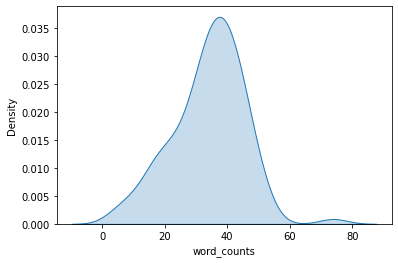

In [ ]:
sns.kdeplot(df['word_counts'],shade=True)
#showing highest number of words in a tweet are around 40 to 45

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords=stopwords.words('english')
def _get_stopwords_counts(x):
	l = len([t for t in x.split() if t in stopwords])
	return l
df['stopwords_counts'] = df['Tweet'].apply(lambda x: _get_stopwords_counts(x))
print(df['stopwords_counts'])

0     11
1      0
2     11
3      3
4     16
      ..
95    10
96    14
97     4
98     6
99    11
Name: stopwords_counts, Length: 100, dtype: int64


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<AxesSubplot:xlabel='stopwords_counts', ylabel='Density'>

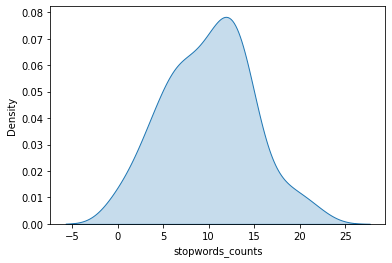

In [ ]:
sns.kdeplot(df['stopwords_counts'],shade=True)

In [ ]:
#Most and Least command words

In [ ]:
import re
str = re.sub(r'[^\w]',' ',df.Tweet[1] ).replace("_"," ")
print(str)

 Syria  Earthquake  Help  Donations


In [ ]:
#getting frequency of each words occured in all the Tweets in decreasing order
wordfreq={}
def get_word_freq(text):
  words = text.split()
  wfreq=[words.count(w) for w in words]
  for word in words:
    if word not in wordfreq:
          wordfreq[word] = 0 
    wordfreq[word] += 1

for i in range(0,100):
  get_word_freq(df.iloc[i]['Tweet'])
print(wordfreq)
wordfreq= sorted(wordfreq.items(), key=lambda x:x[1],reverse=True)
print(wordfreq)

{'Desperation': 1, 'and': 94, 'resilience!': 1, 'This': 3, 'man': 1, 'in': 82, 'Easter': 1, '#Aleppo': 2, 'reopened': 1, 'his': 6, 'shop,': 1, 'which': 1, 'is': 20, 'under': 1, '#earthquake': 72, '#syriaearthquake': 2, 'destroyed': 1, 'home.': 1, '“I': 1, 'have': 11, 'no': 1, 'option”': 1, 'he': 1, 'told': 1, 'me.': 1, 'Help': 11, 'here': 4, 'https://t.co/ApWnZZ9Pp3': 1, 'https://t.co/8UIjohMA2x': 1, '#Syria': 24, '#Earthquake': 10, '#Help': 1, '#Donations': 1, '@duyguomuzl': 1, '@Meghesik': 1, '@melina_power': 1, '@YacoubianAline': 1, '@peaceforarmenia': 1, '@mekquirik': 1, '@galgoulaa': 1, '@AMinalyan': 1, '@historyarmenia': 1, '@ARAMAC_CA': 1, '@usembarmenia': 1, '@UNArmenia': 1, '@rita_minassian': 1, '@PBalian11': 1, '@dsderian': 1, '@PetrosyanTeresa': 1, '@ArtinEsq': 1, '@UzayBulut14': 1, '@TekTurkiyeIcin': 1, '@tugceinanc': 1, '@fakircoin': 1, '@yigidimhelekalk': 1, '@ekumeniklik': 1, '@serdarkilic9': 1, '@aniboghoss': 1, '@Zulaila82153837': 1, 'The': 9, 'alone': 1, 'seems': 1, '

In [ ]:
print(type(wordfreq))

<class 'list'>


In [ ]:
from matplotlib import pyplot as plt
import numpy as np

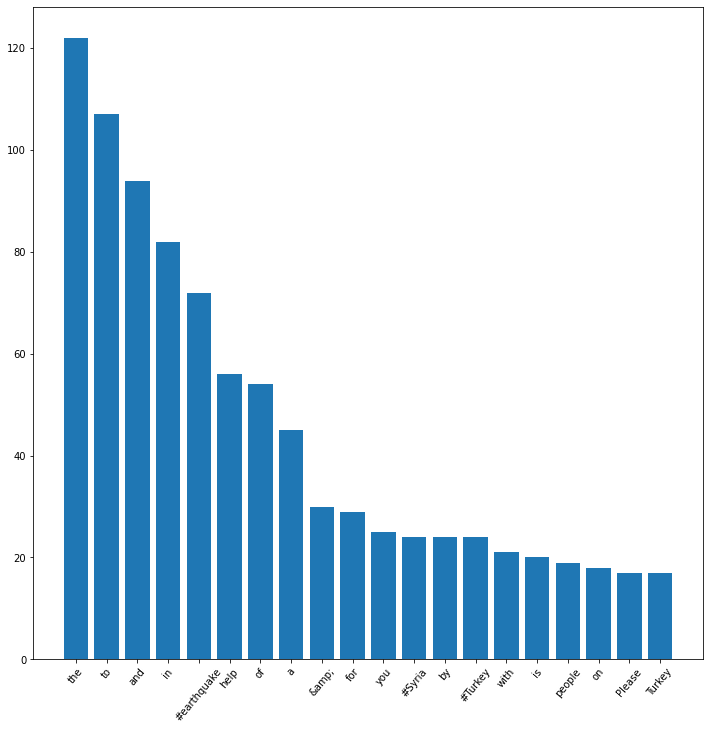

In [ ]:
#bar plot for 20 most common words
words=[]
wordfreqs=[]
for i in range(0,20):
  words.append(wordfreq[i][0])
  wordfreqs.append(wordfreq[i][1])
plt.figure(figsize=(12,12))
plt.bar(words, wordfreqs)
plt.xticks(rotation=50)
plt.show()

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 128591 (\N{PERSON WITH FOLDED HANDS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


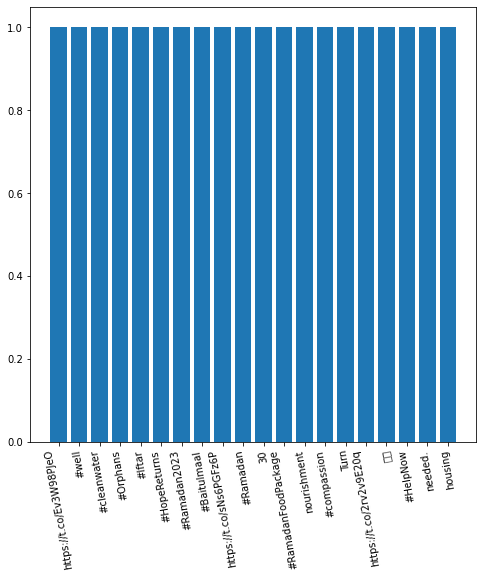

In [ ]:
#bar plot for 20 most common words
words=[]
wordfreqs=[]
for i in range(len(wordfreq)-1,len(wordfreq)-21,-1):
  words.append(wordfreq[i][0])
  wordfreqs.append(wordfreq[i][1])
plt.figure(figsize=(8,8))
plt.bar(words, wordfreqs)
plt.xticks(rotation=100)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def get_ngram(df, col, ngram_range):
	vectorizer = CountVectorizer(ngram_range=(ngram_range, ngram_range))
	vectorizer.fit_transform(df[col])
	ngram = vectorizer.vocabulary_
	ngram = sorted(ngram.items(), key = lambda x: x[1], reverse=True)

	return ngram
bigram = get_ngram(df,'Tweet', ngram_range=2)

In [ ]:
bigram[:20]

[('zulaila82153837 the', 2409),
 ('zionist jew', 2408),
 ('yrs since', 2407),
 ('your support', 2406),
 ('your sales', 2405),
 ('your revenue', 2404),
 ('your next', 2403),
 ('your little', 2402),
 ('your help', 2401),
 ('your friends', 2400),
 ('your contribution', 2399),
 ('your compassion', 2398),
 ('your business', 2397),
 ('your bid', 2396),
 ('you willing', 2395),
 ('you to', 2394),
 ('you qualify', 2393),
 ('you increase', 2392),
 ('you https', 2391),
 ('you failed', 2390)]

In [ ]:
#storing all the tweet as a single string
words=""
for i in range(0,len(wordfreq)):
  words+=wordfreq[i][0]
words

'thetoandin#earthquakehelpofa&amp;foryou#Syriaby#TurkeywithispeopleonPleaseTurkeyneedourareyourSyriasupportvictimsearthquakecanThankweWe-haveHelpfromwill#EarthquakeaffectedusmorebeTheanEarthquake|thistheirstillnotconsiderthose#helpathasafterkm/ssharehelp!#earthquakereliefdonationthatwho#earthquake,areahiscausedallwhatfriends.OURcontributewhatevercan.you!https://t.co/CDUCZWUKcdIfcan,#donatehelp.familythandon\'tfreedoing#donationmillionquakeviaoverwasmonthdonate3-6-2023M6#Philippines🧵GeologythreadherelivingneededdodisasterPLEASEforgetthesepeople!buildhttps://t.co/6Cc7sj0zpPitwe\'veregionsnowcontributionprovide#TurkeyEarthquakebeendevastating6partnersreadyfoodJapanorprovided#TürkiyeA#Syria.aidfirstone#aidduringDonateTothroughMarchmustAlpriorThisloss🇹🇷prayers+butlostparticularlyhowhelp:Takeaction#earthquake-resilientsociety💟We\'reprofitNGOofferingad-freeservices.you🙏sincekeepalwaysdone:informreassurecitizens#earthquake-pronestandside-by-sidepopulationcase#earthquake🙏you💟effectsYoucome#resc

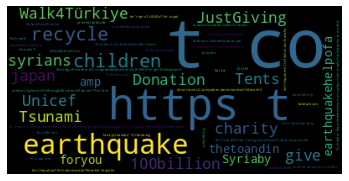

In [ ]:
#printing wordcloud for the tweets
from wordcloud import WordCloud 
word_cloud = WordCloud(max_font_size=80).generate(words)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [ ]:
import nltk
import spacy
 
# essential entity models downloads
nltk.downloader.download('maxent_ne_chunker')
nltk.downloader.download('words')
nltk.downloader.download('treebank')
nltk.downloader.download('maxent_treebank_pos_tagger')
nltk.downloader.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/maxent_treebank_pos_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
import locationtagger

# initializing sample text

sample_text = df.iloc[58]['Tweet']
 
# extracting entities.
place_entity = locationtagger.find_locations(text = sample_text)
 
# getting all countries
print("The countries in text : ")
print(place_entity.countries)
 
# getting all states
print("The states in text : ")
print(place_entity.regions)
 
# getting all cities
print("The cities in text : ")
print(place_entity.cities)

# getting all country regions
print("The countries regions in text : ")
print(place_entity.country_regions)
 
# getting all country cities
print("The countries cities in text : ")
print(place_entity.country_cities)
 
# getting all other countries
print("All other countries in text : ")
print(place_entity.other_countries)
 
# getting all region cities
print("The region cities in text : ")
print(place_entity.region_cities)
 
# getting all other regions
print("All other regions in text : ")
print(place_entity.other_regions)
 
# getting all other entities
print("All other entities in text : ")
print(place_entity.other)


The countries in text : 
[]
The states in text : 
[]
The cities in text : 
[]
The countries regions in text : 
{}
The countries cities in text : 
{}
All other countries in text : 
[]
The region cities in text : 
{}
All other regions in text : 
[]
All other entities in text : 
['JustGiving', 'PO', 'Thursday th March', 'Gosport Alverstoke LeeOnTheSolent', 'CNf', 'Gosport Alverstoke', 'Southsea Fratton Charity Donate', 'REUSE']


In [ ]:
import locationtagger
import json

# initializing sample text

# extracting entities.
for i in range (0,100):
  place_entity = locationtagger.find_locations(text = df.iloc[i]['Tweet'])
  df.loc[i,'countries']=json.dumps(place_entity.countries)
  df.loc[i,'region']=json.dumps(place_entity.region_cities)
  df.loc[i,'cities']=json.dumps(place_entity.cities)
  df.loc[i,'country_region']=json.dumps(place_entity.country_regions)
  df.loc[i,'country_cities']=json.dumps(place_entity.country_cities)
  df.loc[i,'other_countries']=json.dumps(place_entity.other_countries)
  df.loc[i,'region_cities']=json.dumps(place_entity.region_cities)
  df.loc[i,'other_region']=json.dumps(place_entity.other_regions)
  df.loc[i,'other']=json.dumps(place_entity.other)
 

In [ ]:
df.head()

,Date,User,Tweet,Location,char_counts,word_counts,stopwords_counts,countries,region,cities,country_region,country_cities,other_countries,region_cities,other_region,other
0,2023-03-12 19:47:06+00:00,JosephAlsousou,Desperation and resilience! \n\nThis man in E...,"Oxford, UK",197,30,11,[],"{""Aleppo Governate"": [""Aleppo""]}","[""Aleppo""]",{},"{""Syrian Arab Republic"": [""Aleppo""]}","[""Syrian Arab Republic""]","{""Aleppo Governate"": [""Aleppo""]}","[""Aleppo Governate""]","[""Easter Aleppo"", ""Easter"", ""ApWnZZ Pp"", ""UIjo..."
1,2023-03-12 16:41:57+00:00,LuluWalcott1,#Syria #Earthquake #Help #Donations,"Los Angeles, CA",32,4,0,[],"{""Virginia"": [""Syria""]}","[""Syria""]",{},"{""United States"": [""Syria""]}","[""United States""]","{""Virginia"": [""Syria""]}","[""Virginia""]","[""Earthquake Help Donations""]"
2,2023-03-12 11:35:25+00:00,TabibianMDPhD,@duyguomuzl @Meghesik @melina_power @Yacoubian...,"Լեռնային Աշխարհ, CA",560,74,11,[],{},[],{},{},[],{},[],"[""Meghesik"", ""YacoubianAline"", ""galgoulaa"", ""A..."
3,2023-03-12 10:11:37+00:00,Abdo_Milad05,Turkey Destroyed by massive Earthquake | India...,libya,145,22,3,"[""India"", ""Turkey""]","{""North Carolina"": [""Turkey""], ""Ohio"": [""Russi...","[""Turkey"", ""Russia"", ""Syria""]",{},"{""United States"": [""Turkey"", ""Russia"", ""Syria""]}","[""United States""]","{""North Carolina"": [""Turkey""], ""Ohio"": [""Russi...","[""North Carolina"", ""Ohio"", ""Virginia"", ""Texas""]","[""PM Modi"", ""https t.co"", ""Earthquake India"", ..."
4,2023-03-12 06:33:26+00:00,Lotteruppert,"In this kitchen in Kahramanmaras, @Kizilay co...","Gaziantep, Turkiye",257,46,16,[],{},[],{},{},[],{},[],"[""Kahramanmaras"", ""Kizilay"", ""Trkiye"", ""the mo..."


In [ ]:
import nltk
named_entities = []
nes = nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sample_text)))
for ne in nes:
    if type(ne) is nltk.tree.Tree:
        if (ne.label() == 'GPE' or ne.label() == 'PERSON' or ne.label() == 'ORGANIZATION'):
            l = []
            for i in ne.leaves():
                l.append(i[0])
            s = u' '.join(l)
            if not (s in named_entities):
                named_entities.append(s)

print(named_entities)



['PO', 'LeeOnTheSolent', 'Fratton', 'Donate', 'REUSE', 'RECYCLE', 'SECONDLIFE']
